<a href="https://colab.research.google.com/github/fionamorrow/PHSX-218/blob/main/PHSXLab6_FM_0327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

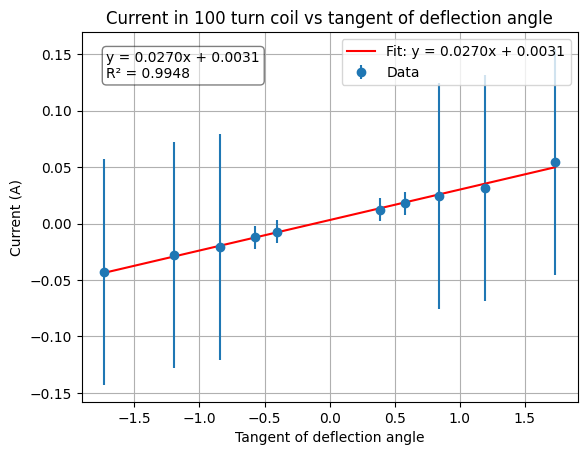

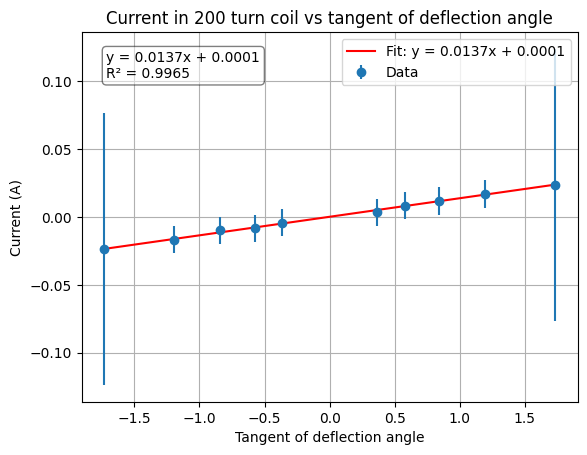

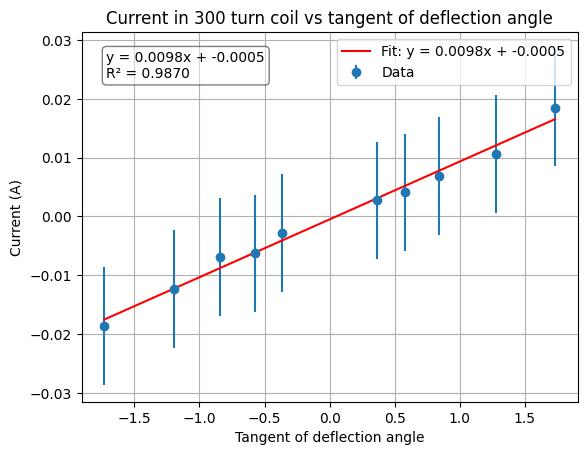

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
tan_100 = np.array([-0.404, 0.384, -0.577, 0.577, -0.839, 0.839, -1.192, 1.192, -1.732, 1.732])
I_100 = np.array([-0.00722, 0.01236, -0.01221, 0.01794, -0.0207, 0.0247, -0.0276, 0.0318, -0.0429, 0.0547])
I_err_100 = np.array([0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

tan_200 = np.array([-0.364, 0.364, -0.577, 0.577, -0.839, 0.839, -1.192, 1.192, -1.732, 1.732])
I_200 = np.array([-0.00424, 0.00327, -0.00836, 0.0084, -0.00977, 0.01177, -0.01683, 0.01687, -0.0237, 0.0237])
I_err_200 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1])

tan_300 = np.array([-0.364, 0.364, -0.577, 0.577, -0.839, 0.839, -1.192, 1.280, -1.732, 1.732])
I_300 = np.array([-0.00277, 0.00275, -0.00627, 0.0041, -0.0069, 0.00688, -0.0123, 0.01061, -0.01866, 0.0185])
I_err_300 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

# Function to add best fit line and equation
def plot_with_fit(tan, I, I_err, title):
    plt.figure()
    plt.errorbar(tan, I, yerr=I_err, fmt='o', label='Data')

    # Perform linear regression (weighted by inverse of errors if needed)
    coefficients = np.polyfit(tan, I, 1)
    slope, intercept = coefficients
    fit_line = np.poly1d(coefficients)

    # Plot best fit line
    x_fit = np.linspace(min(tan), max(tan), 100)
    plt.plot(x_fit, fit_line(x_fit), 'r-', label=f'Fit: y = {slope:.4f}x + {intercept:.4f}')

    plt.xlabel('Tangent of deflection angle')
    plt.ylabel('Current (A)')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Add equation text box
    equation_text = f'y = {slope:.4f}x + {intercept:.4f}\nR² = {np.corrcoef(tan, I)[0,1]**2:.4f}'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Create plots
plot_with_fit(tan_100, I_100, I_err_100, 'Current in 100 turn coil vs tangent of deflection angle')
plot_with_fit(tan_200, I_200, I_err_200, 'Current in 200 turn coil vs tangent of deflection angle')
plot_with_fit(tan_300, I_300, I_err_300, 'Current in 300 turn coil vs tangent of deflection angle')

plt.show()